In [5]:
# import libraries
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# read in cleaned data file
df = pd.read_csv('netflix_titles_nov_2019_cleaned.csv')

In [4]:
df.head()

,Unnamed: 0,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_month
0,0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019-11
1,1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11
2,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019-11
3,3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11
4,4,80213643,Chip and Potato,unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN


## Counts of title

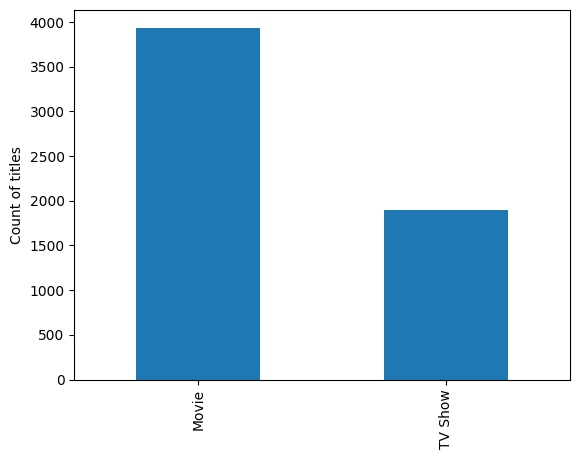

In [13]:
# count of titles by type
titles_by_type = df.groupby('type')['title'].count()

plt.figure()
titles_by_type.plot.bar()
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

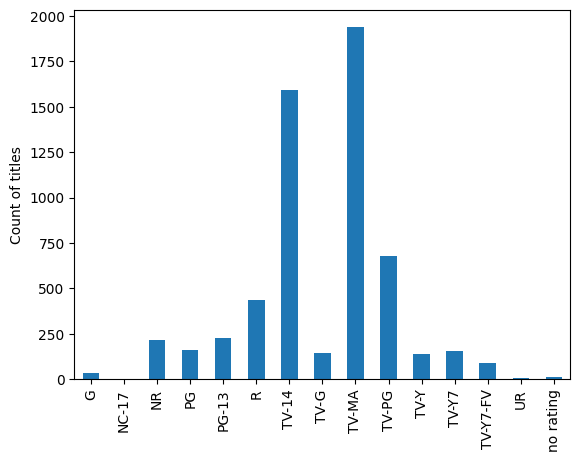

In [14]:
# count of titles by rating
titles_by_rating = df.groupby('rating')['title'].count()

plt.figure()
titles_by_rating.plot.bar()
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

In [19]:
# use only the first country listed in the country column
df['first_country'] = df['country'].str.split(',').str[0]

df.head()

,Unnamed: 0,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_month,first_country
0,0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019-11,South Korea
1,1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11,unknown
2,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019-11,India
3,3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11,France
4,4,80213643,Chip and Potato,unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,Canada


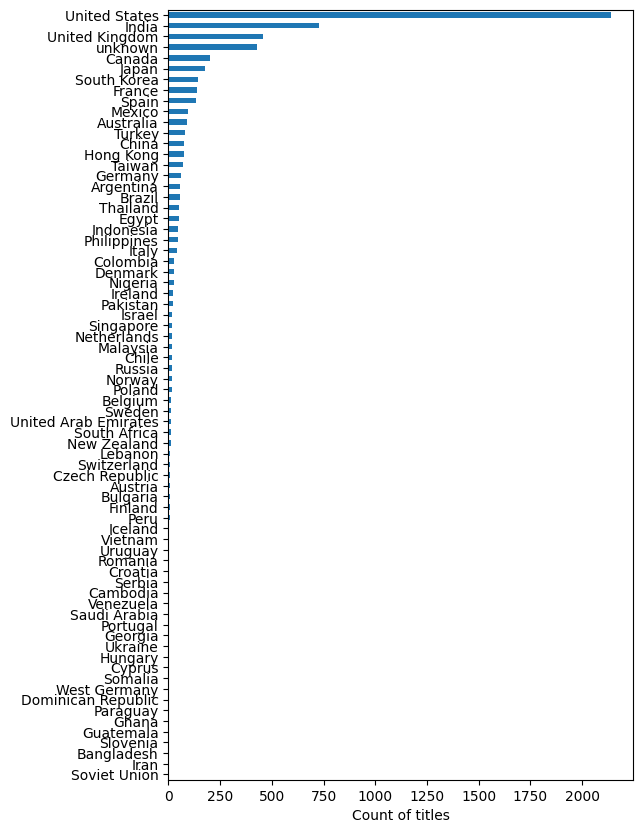

In [26]:
# count of titles by first country
titles_by_first_country = df.groupby('first_country')['title'].count()

# sort by count
titles_by_first_country = titles_by_first_country.sort_values()

plt.figure(figsize = (6,10))
titles_by_first_country.plot.barh()
plt.xlabel('Count of titles')
plt.ylabel(None)

plt.show();

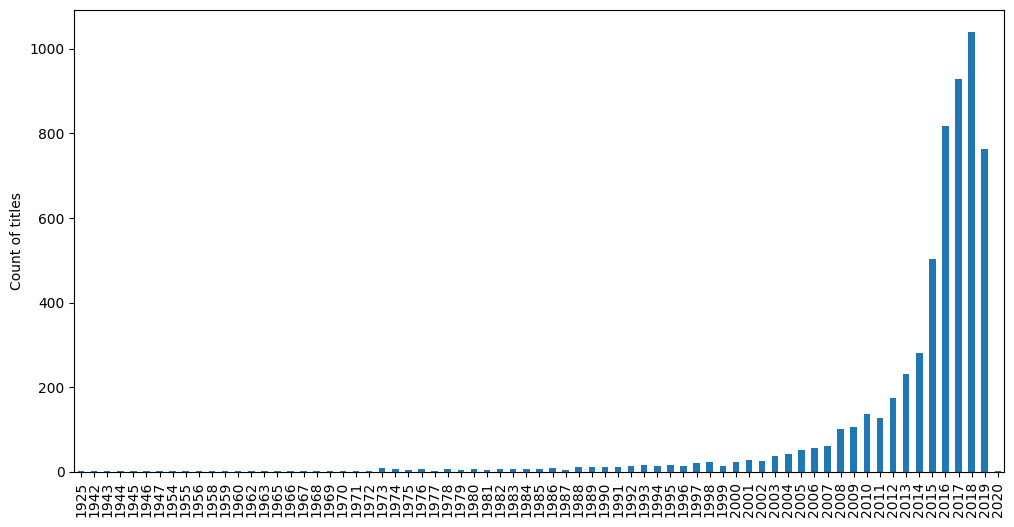

In [29]:
# count of titles by release year
titles_by_release_yr = df.groupby('release_year')['title'].count()

plt.figure(figsize = (12,6))
titles_by_release_yr.plot.bar()
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

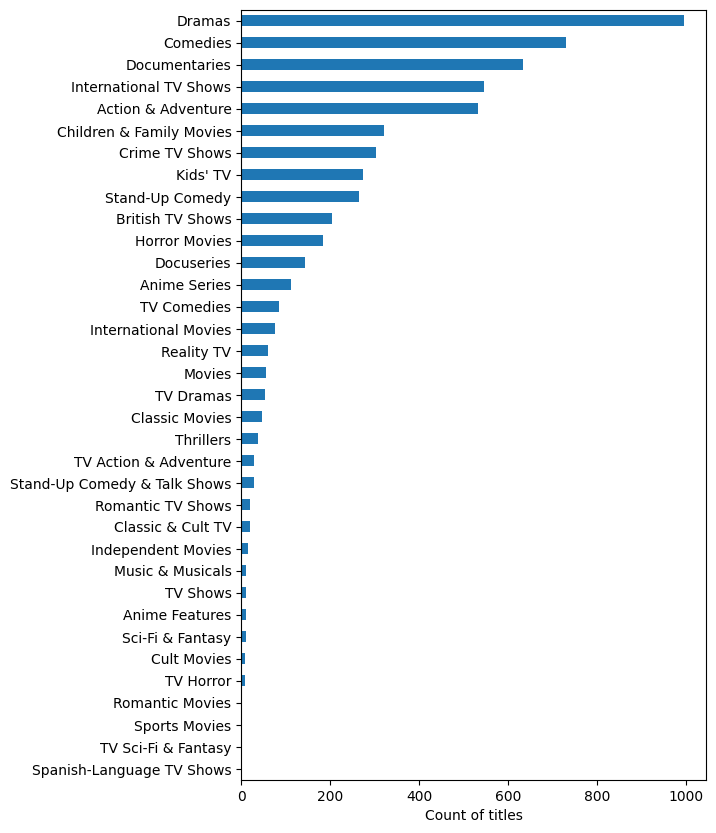

In [53]:
# use only the first genre listed in the listed_in column
df['first_genre'] = df['listed_in'].str.split(',').str[0]

# count of titles by first genre
titles_by_first_genre = df.groupby('first_genre')['title'].count()

# sort by count
titles_by_first_genre = titles_by_first_genre.sort_values()

plt.figure(figsize = (6,10))
titles_by_first_genre.plot.barh()
plt.xlabel('Count of titles')
plt.ylabel(None)

plt.show();

## Movies only

In [37]:
movie = df[df['type'] == 'Movie']

movie.head()

,Unnamed: 0,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_month,first_country
1,1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11,unknown
2,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019-11,India
3,3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11,France
5,5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2019-11-29,2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,2019-11,Nigeria
6,6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019-11-29,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie,2019-11,France


In [38]:
# remove 'min' and create numerical version of duration
movie['duration_num'] = movie['duration'].str[:-4]

movie['duration_num'] = pd.to_numeric(movie['duration_num'])

C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_17908\2042430684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration_num'] = movie['duration'].str[:-4]
C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_17908\2042430684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration_num'] = pd.to_numeric(movie['duration_num'])


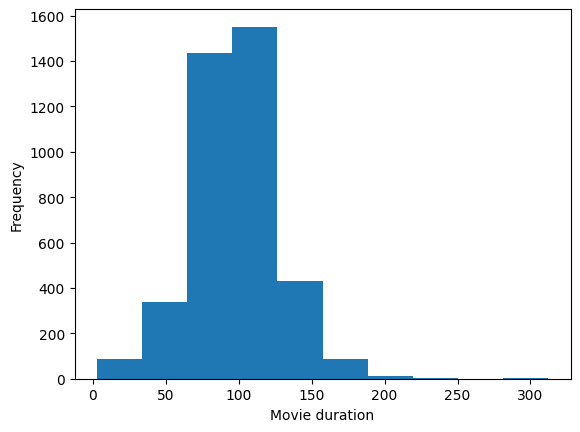

In [40]:
# count of movies by duration
plt.figure()

movie['duration_num'].plot(kind = 'hist')

plt.xlabel('Movie duration')

plt.show();

## TV shows only duration

In [42]:
tv = df[df['type'] == 'TV Show']

tv.head()

,Unnamed: 0,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_month,first_country
0,0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019-11,South Korea
4,4,80213643,Chip and Potato,unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,Canada
8,8,70205672,La Reina del Sur,unknown,"Kate del Castillo, Cristina Urgel, Alberto Jim...","United States, Spain, Colombia, Mexico",NaN,2019,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, Spanis...",This compelling show tells the story of the le...,TV Show,NaN,United States
11,11,81094391,Sugar Rush Christmas,unknown,"Hunter March, Candace Nelson, Adriano Zumbo",United States,2019-11-29,2019,TV-PG,1 Season,Reality TV,"It's everything you love about ""Sugar Rush"" – ...",TV Show,2019-11,United States
13,13,81152641,The Charming Stepmom,unknown,"Shahkrit Yamnarm, View Wannarot Sontichai, Kri...",unknown,2019-11-29,2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A quirky fashion student becomes the nanny of ...,TV Show,2019-11,unknown


In [49]:
# remove 'Season'/'Seasons' and create numerical version of duration
tv['duration_num'] = tv['duration'].str[:-7]

tv['duration_num'] = pd.to_numeric(tv['duration_num'])

C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_17908\3528839491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['duration_num'] = tv['duration'].str[:-7]
C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_17908\3528839491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['duration_num'] = pd.to_numeric(tv['duration_num'])


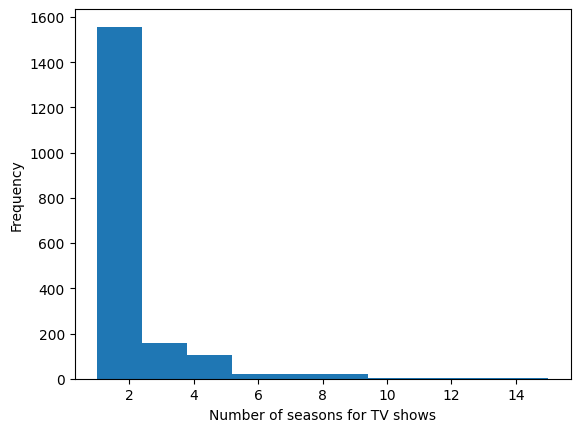

In [50]:
# count of tv shows by duration
plt.figure()

tv['duration_num'].plot(kind = 'hist')

plt.xlabel('Number of seasons for TV shows')

plt.show();

## Movie vs TV show comparison